<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371D Homework 4

### Problem 0 (3 points)

## Part 1: Hyperplanes 

In [56]:
import pickle


filename = 'data.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)

In [57]:
def check(P, n, beta):
    small = np.sqrt(np.finfo(float).eps)
    print('Checks for n = {}, beta = {}:'.format(n, beta))
    nn = np.linalg.norm(n)
    if np.abs(nn - 1.) < small:
        print('\tnorm of n is 1 as expected', end=', ')
    else:
        print('\tnorm of n is {}, while expected norm is 1'.format(nn))
    if beta >= 0:
        print('beta is nonnegative as expected')
    else:
        print('beta = {} is negative, while it should be nonnegative'.format(beta))
    if P.shape[0] == len(n):
        print('\tnumber of points is correct', end=', ')
    else:
        print('found {} points but expected {}'.format(P.shape[0], len(n)))
    checks = ', '.join(['OK' if ok else 'Not OK' for ok in
                        np.abs(np.dot(P, n) - beta) < small])
    print('individual point checks: {}'.format(checks))

### Problem 1.1 (Exam Style)

First, we must assume that j<d because by gefn. these points make up a hyperplane. All the points that are in a hyperplane are orthogonal to the normal vector that defines the hyperplane, so the centroid must be orthogonal to the normal vector to be in the hyperplane.

normal.dot(centroid)= n.dot(1/j(p_0+...+p_j-1))

normal.dot(centroid)= 1/j(n*p_0+...+n*p_j-1) by distributive property

normal.dot(centroid)= 1/j(0+...+0)

normal.dot(centroid)= 0/j = 0

Therefore, the centroid is orthogonal to the hyperplane.

### Problem 1.2 (Exam Style)

In [58]:
from scipy.linalg import null_space
import numpy as np

def null(A):
    return null_space(A).transpose()

In [59]:
def rank(A):
    NA=null(A)
    num_rows, num_cols = NA.shape
    num_rows1, num_cols1 = A.shape
    return num_cols1-num_rows
    
    

In [60]:
try:
    ranks = [str(rank(P)) for P in data['rank']]
    print(', '.join(ranks))
except NameError:
    print('rank not implemented?')

1, 2, 1, 2, 2, 3, 2


### Problem 1.3 (Exam Style)

In [65]:
def generic(P):
    x = np.zeros(P[0].size)
    for i in range(P[0].size):
        cent=np.mean(P[:, i])
        x[i] = cent
    for j in range(P[:, 0].size):
        P[j]=P[j]-x
    gentest=rank(P)+1
    num_rows, num_cols = P.shape
    if(gentest==num_rows):
        return True
    return False

In [66]:
try:
    answers = [str(generic(P)) for P in data['generic']]
    print(', '.join(answers))
except NameError:
    print('generic not implemented?')

True, True, True, False, False, False


### Problem 1.4 (Exam Style)

In [119]:
def hyperplane(P):
    assert generic(P)==True, "Points are not generic"
    w=null(P)
    n=w.reshape(w.size,)
    
    #calculate beta
    bval=n.dot(P[0])
    bval = np.abs(bval)
    return n, bval
            

In [121]:
try:
    with np.printoptions(precision=4):
        for P in data['hyperplane']:
            n, beta = hyperplane(P)
            check(P, n, beta)
except NameError:
    print('hyperplane not implemented?')

Checks for n = [1.], beta = 0.0:
	norm of n is 1 as expected, beta is nonnegative as expected
	number of points is correct, individual point checks: OK
Checks for n = [-0.7071  0.7071], beta = 1.1102230246251565e-16:
	norm of n is 1 as expected, beta is nonnegative as expected
	number of points is correct, individual point checks: OK, OK
Checks for n = [0.866 0.5  ], beta = 1.1102230246251565e-15:
	norm of n is 1 as expected, beta is nonnegative as expected
	number of points is correct, individual point checks: OK, OK
Checks for n = [-0.5774 -0.5774 -0.5774], beta = 2.220446049250313e-16:
	norm of n is 1 as expected, beta is nonnegative as expected
	number of points is correct, individual point checks: OK, OK, OK
Checks for n = [0. 0. 0. 1.], beta = 0.0:
	norm of n is 1 as expected, beta is nonnegative as expected
	number of points is correct, individual point checks: OK, OK, OK, OK


### Problem 1.5 (Exam Style)

The function points calculates the vectors orthogonal to the normal vector and then adds an addition vector made out of a linear combination of one of the orthogonal vectors. The function then adds the hyperplane's distance from the origin (the dot product of beta and the normal vector) to orient the vectors correctly.

In [248]:
def points(n, beta): 
    val = n.dot(beta)
    hint=null([n])
    d=n.size
    hyper=np.zeros((d,d))
    if(hint.size<=0):
        hyper[0]=0 + val
        return hyper
    for i in range(hint.shape[0]):
        hyper[i]=hint[i]
    hyper[d-1]=hint[0]*3
    hyper = hyper+val
    return hyper

In [250]:
try:
    with np.printoptions(precision=4):
        for n, beta in data['points']:
            P = points(n, beta)
            check(P, n, beta)
except NameError:
    print('points not implemented?')

Checks for n = [-1.], beta = 4.0:
	norm of n is 1 as expected, beta is nonnegative as expected
	number of points is correct, individual point checks: OK
Checks for n = [-0.7071  0.7071], beta = 0.0:
	norm of n is 1 as expected, beta is nonnegative as expected
	number of points is correct, individual point checks: OK, OK
Checks for n = [0.866 0.5  ], beta = 3.0:
	norm of n is 1 as expected, beta is nonnegative as expected
	number of points is correct, individual point checks: OK, OK
Checks for n = [-0.5774 -0.5774 -0.5774], beta = 2.0:
	norm of n is 1 as expected, beta is nonnegative as expected
	number of points is correct, individual point checks: OK, OK, OK
Checks for n = [0. 0. 0. 1.], beta = 0.0:
	norm of n is 1 as expected, beta is nonnegative as expected
	number of points is correct, individual point checks: OK, OK, OK, OK


## Part 2: A Binary Linear Classifier for Linearly Separable Data

### Problem 2.1 (Exam Style)

𝐠𝑛=[-y_n*x_n, -y_n]

### Problem 2.2

In [261]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def plot_line(v):
    x_lim, y_lim = plt.xlim(), plt.ylim()
    w, b = v[:2], v[2]
    p = []
    if w[1] != 0.:
        for x in x_lim:
            y = - (b + w[0] * x) / w[1]
            if y_lim[0] <= y <= y_lim[1]:
                p.append((x, y))
    if w[0] != 0.:
        for y in y_lim:
            x = - (b + w[1] * y) / w[0]
            if x_lim[0] < x < x_lim[1]:
                p.append((x, y))
    if len(p) < 2:
        print('Warning: line does not intersect the axis rectangle')
    else:
        plt.plot([p[0][0], p[1][0]], [p[0][1], p[1][1]], 'r')
        plt.xlim(x_lim)
        plt.ylim(y_lim)


def show(T, v=None, epochs=None):
    x, y = (np.array(item) for item in list(zip(*T)))
    assert x.shape[1] == 2, 'Can only plot points on the plane'
    plt.plot(x[:, 0][y == -1], x[:, 1][y == -1], 'g^')
    plt.plot(x[:, 0][y == 1], x[:, 1][y == 1], 'bs')
    if v is not None:
        plot_line(v)
    plt.gca().set_aspect(1)
    plt.xticks([])
    plt.yticks([])
    if epochs is not None:
        plt.title('{} epochs to convergence'.format(epochs))

In [262]:
import pickle


file_name = 'training_set.pkl'
with open(file_name, 'rb') as file:
    T = pickle.load(file)

In [347]:
from random import shuffle


In [356]:
def train(T, r=.1, max_epochs=100):
    from random import shuffle
    v=np.zeros((3,1))
    epochs = 0
    check = 1
    for i in range (max_epochs):
        if (check == 0):
            return v, epochs
        check = 0
        for x, y in T:
            gr=np.zeros((3,1))
            gr[0]=-1*y*x[0]
            gr[1]=-1*y*x[1]
            gr[2]=-1*y
            loss = 0
            for val in gr:
                loss = val + loss
            if loss == 0:
                return v, epochs
            if loss != 0:
                upd = gr*r
                v = np.subtract(v, upd)
                check = 1
        shuffle(T)
        epochs = epochs + 1
    return v, epochs
        


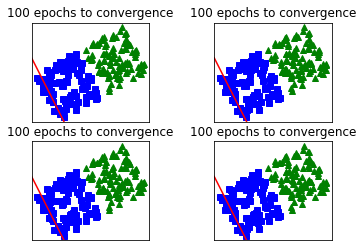

In [357]:
fig = plt.figure()
fig.add_subplot(221)
v, epoch = train(T)
show(T, v, epoch)
fig.add_subplot(222)
v, epoch = train(T)
show(T, v, epoch)
fig.add_subplot(223)
v, epoch = train(T)
show(T, v, epoch)
fig.add_subplot(224)
v, epoch = train(T)
show(T, v, epoch)

### Problem 2.3 (Exam Style)

The equation 𝐰𝑇𝐱+𝑏=0 does not take into account distance from each point. The function calculates the sign of the equation for relative distance, i.e. whether a point is in one group or another, but it does not specify distance more than that because many different hyperplanes can be used to separate data.

example 1:

v1=([1,0],-1/2)

v2=([1,0],-1/4)

loss 1:1/2

loss 2:3/4

X is closer to v1, but because multiple hyperplanes can be used in the space between two regions and return valid signed results, the loss varies when distance isn't taken into account.

There can also be multiple ways to numerically define a hyperplane, and although these values represent the same hyperplane in space, a basis vector can be represented with different multiplicities.

example 1:

v1=([1,2],-1/2)

v2=([2,4],-1/2)

loss 1: 1/2

loss 2: 1 1/2

The equation lends itself to being flexible for many definitions, whether than be a line a plan or a hyperplane depending on the dimension, but this function doesn't have to specify that w is a simplified basis vector or not. 

### Problem 2.4 (Exam Style)

The algorithm wouldn't converge on a line/plane/hyperplane because the gradient wouldn't make it through the training set without being greater than zero. A linear predictor cannot be created if the data is not linearly separable.

### Problem 2.5 (Exam Style)

The search for c fails when all c's are classified with a negative, opposite sign from b.

When it succeeds, does the bracketing triple shrink below  𝜖  if enough iterations of line search are performed?
Yes, the bracketing triple can shrink below 𝜖 because even after checking if it's smaller than 𝜖 the interval can grow smaller after another iteration.
